In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Step 1: Data Preprocessing
# Check for nulls and data types
missing_values = df.isnull().sum()
missing_values

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
d_types = df.dtypes
d_types

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [9]:
#Check duplicate rows
duplicate_c = df.duplicated().sum()

In [11]:
duplicate_c 

24206

In [13]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [15]:
feature_names = df.drop("Diabetes_binary", axis=1).columns.tolist()
print(feature_names)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [17]:
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]


In [19]:
X,y

(        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0          1.0       1.0        1.0  40.0     1.0     0.0   
 1          0.0       0.0        0.0  25.0     1.0     0.0   
 2          1.0       1.0        1.0  28.0     0.0     0.0   
 3          1.0       0.0        1.0  27.0     0.0     0.0   
 4          1.0       1.0        1.0  24.0     0.0     0.0   
 ...        ...       ...        ...   ...     ...     ...   
 253675     1.0       1.0        1.0  45.0     0.0     0.0   
 253676     1.0       1.0        1.0  18.0     0.0     0.0   
 253677     0.0       0.0        1.0  28.0     0.0     0.0   
 253678     1.0       0.0        1.0  23.0     0.0     0.0   
 253679     1.0       1.0        1.0  25.0     0.0     0.0   
 
         HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
 0                        0.0           0.0     0.0      1.0  ...   
 1                        0.0           1.0     0.0      0.0  ...   
 2                        0.0           0.0    

In [21]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [25]:
#duplicates value remove
df = df.drop_duplicates()
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]


In [27]:
X,y

(        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0          1.0       1.0        1.0  40.0     1.0     0.0   
 1          0.0       0.0        0.0  25.0     1.0     0.0   
 2          1.0       1.0        1.0  28.0     0.0     0.0   
 3          1.0       0.0        1.0  27.0     0.0     0.0   
 4          1.0       1.0        1.0  24.0     0.0     0.0   
 ...        ...       ...        ...   ...     ...     ...   
 253675     1.0       1.0        1.0  45.0     0.0     0.0   
 253676     1.0       1.0        1.0  18.0     0.0     0.0   
 253677     0.0       0.0        1.0  28.0     0.0     0.0   
 253678     1.0       0.0        1.0  23.0     0.0     0.0   
 253679     1.0       1.0        1.0  25.0     0.0     0.0   
 
         HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
 0                        0.0           0.0     0.0      1.0  ...   
 1                        0.0           1.0     0.0      0.0  ...   
 2                        0.0           0.0    

In [29]:
#Check duplicate rows again
duplicate_c = df.duplicated().sum()
duplicate_c

0

In [31]:
y.value_counts(normalize=True)

Diabetes_binary
0.0    0.847055
1.0    0.152945
Name: proportion, dtype: float64

In [33]:
#See features have <1% variance
low_variance = (X.nunique() / len(X)) < 0.01
print(X.columns[low_variance])  


Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [35]:
#step2: feature analysis
import seaborn as sns

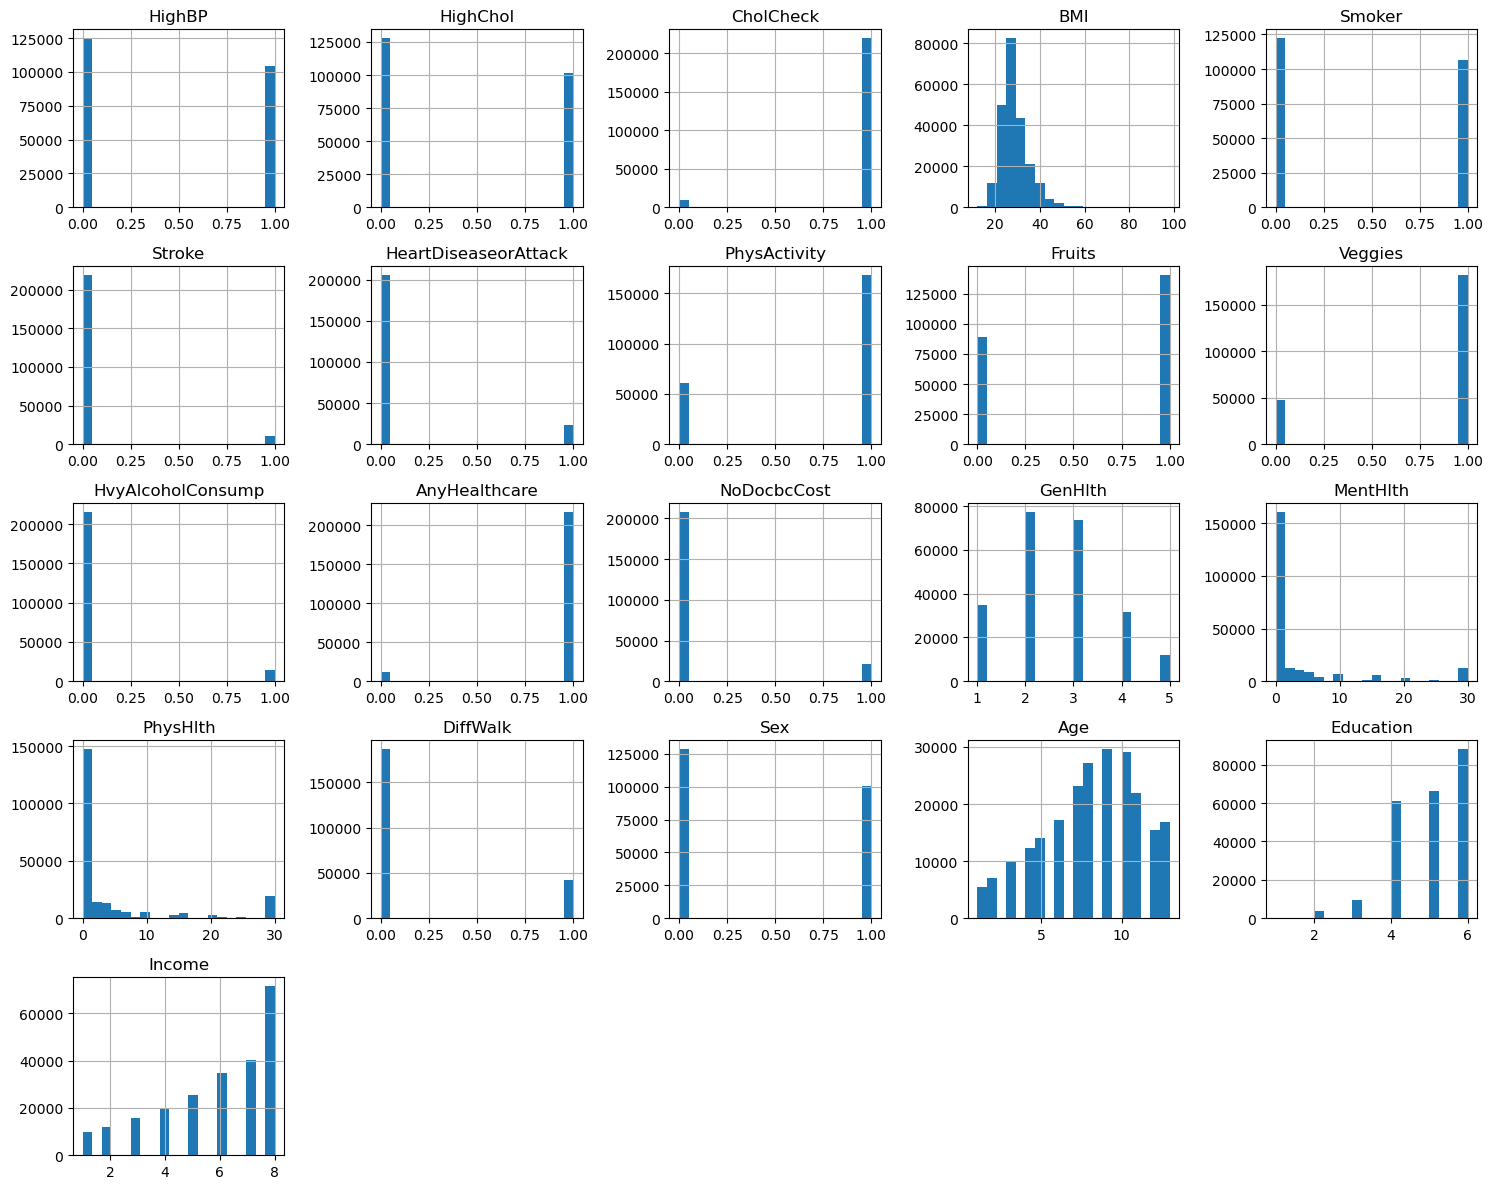

In [37]:
#histograms
X.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

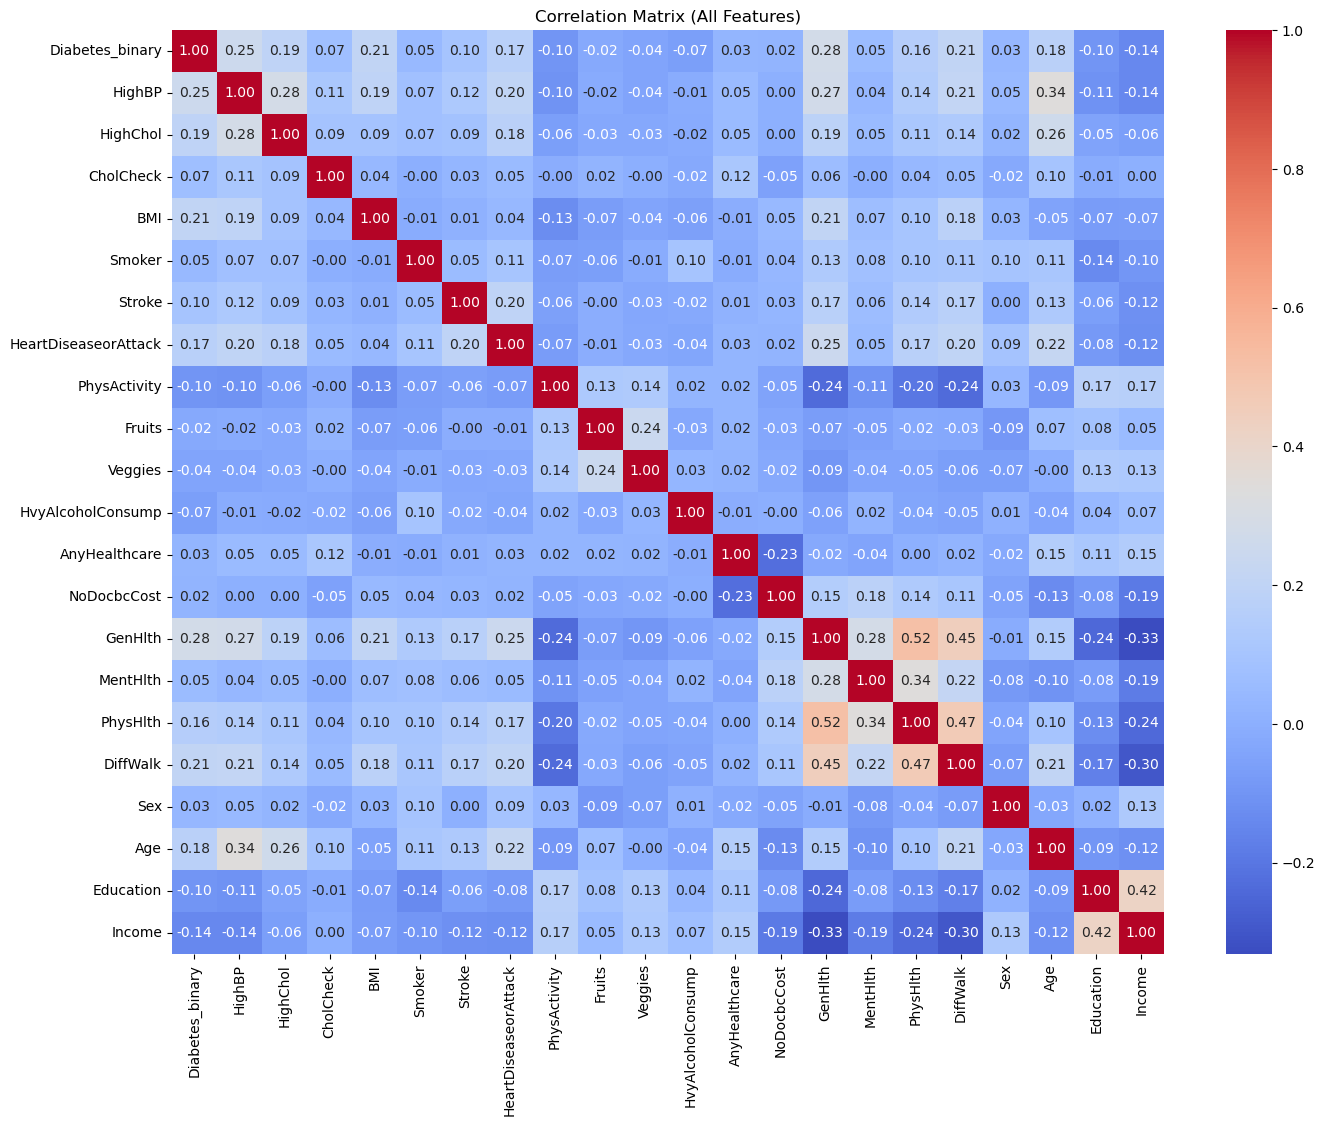

In [38]:
#Correlation Matrix(all features)
plt.figure(figsize=(16, 12))
c_matrix = df.corr(numeric_only=True)
sns.heatmap(c_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (All Features)")
plt.show()

In [39]:
#Correlation with Target
t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").sort_values(ascending=False)
print("Correlation with Diabetes_binary:\n")
print(t_cor)

Correlation with Diabetes_binary:

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
MentHlth                0.054153
Smoker                  0.045504
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64


In [41]:
#corr_abs t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").abs().sort_values(ascending=False)
corr_abs =t_cor.abs().sort_values(ascending=False)
#top correlated features
print(corr_abs)

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
Smoker                  0.045504
Veggies                 0.041734
Sex                     0.032724
AnyHealthcare           0.025331
Fruits                  0.024805
NoDocbcCost             0.020048
Name: Diabetes_binary, dtype: float64


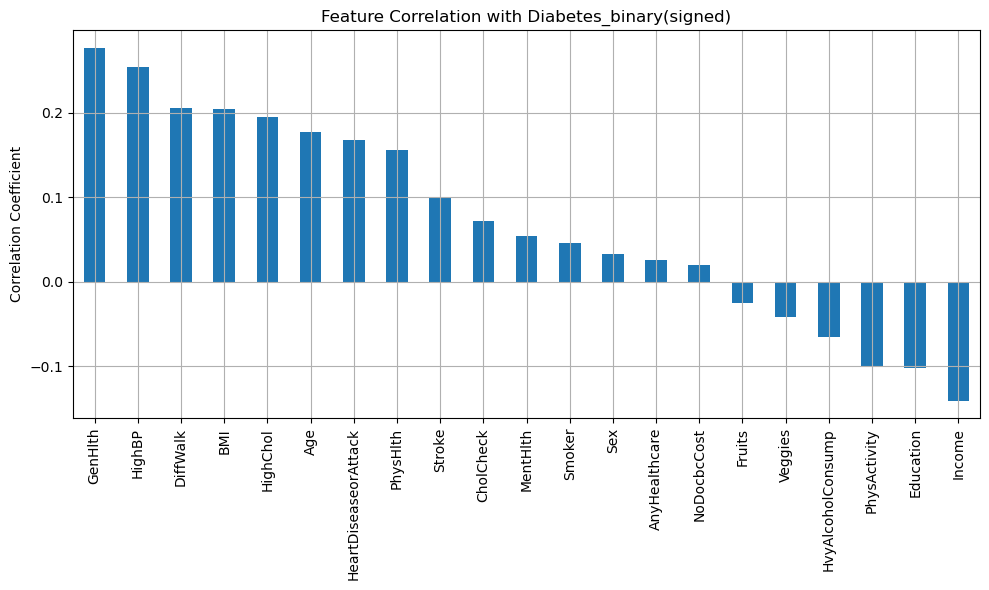

In [45]:
#Visual correlations with target signed
plt.figure(figsize=(10, 6))
t_cor.plot(kind='bar')
plt.title("Feature Correlation with Diabetes_binary(signed)")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\mdnaj\AppData\Local\Temp\ipykernel_15476\1652439018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')


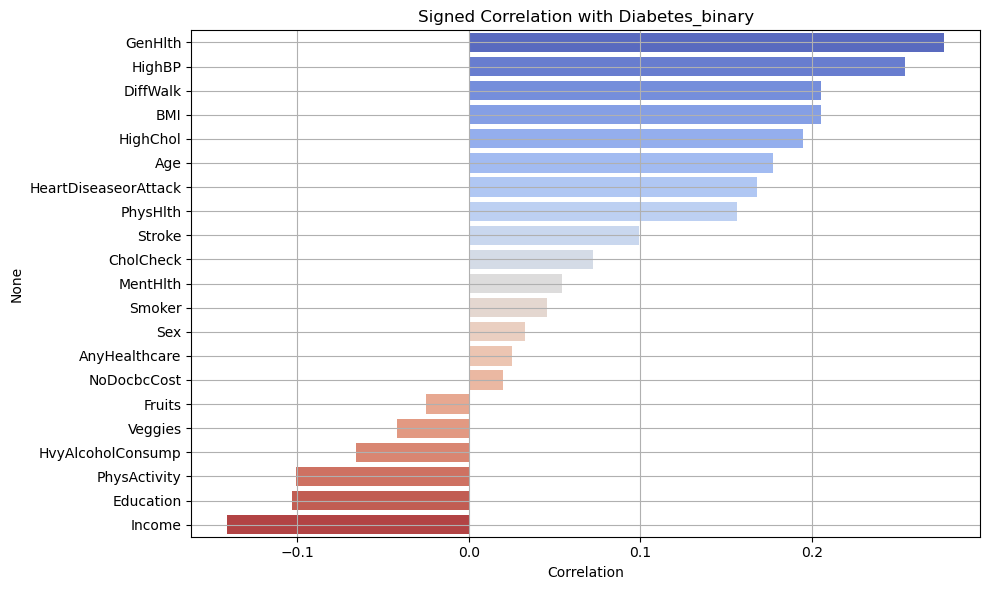

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')
plt.title("Signed Correlation with Diabetes_binary")
plt.xlabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

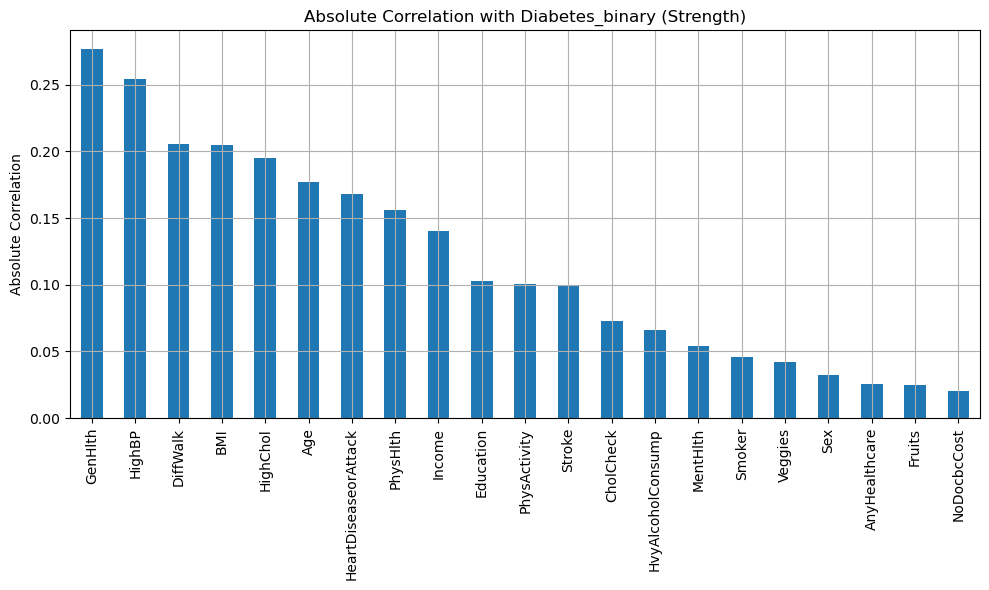

In [49]:
#Visual absolute correlations
plt.figure(figsize=(10, 6))
corr_abs.plot(kind='bar')
plt.title("Absolute Correlation with Diabetes_binary (Strength)")
plt.ylabel("Absolute Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\mdnaj\AppData\Local\Temp\ipykernel_15476\3379147619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')


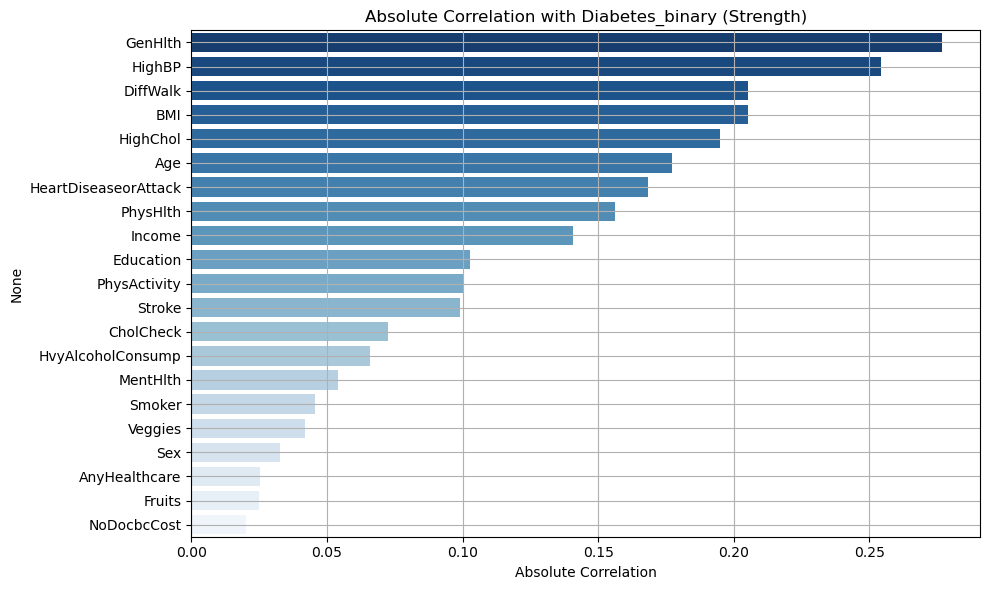

In [51]:
#Visual absolute correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')
plt.title("Absolute Correlation with Diabetes_binary (Strength)")
plt.xlabel("Absolute Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
#Multicollinearity Check(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]  # i+1 because of const
print(vif_data.sort_values("VIF", ascending=False))


                 Feature       VIF
13               GenHlth  1.716096
15              PhysHlth  1.594297
16              DiffWalk  1.511628
20                Income  1.430313
18                   Age  1.353317
0                 HighBP  1.301200
19             Education  1.272080
14              MentHlth  1.221587
6   HeartDiseaseorAttack  1.167062
1               HighChol  1.158112
12           NoDocbcCost  1.135647
7           PhysActivity  1.130509
3                    BMI  1.121050
11         AnyHealthcare  1.109839
9                Veggies  1.098133
8                 Fruits  1.097947
5                 Stroke  1.077470
4                 Smoker  1.076032
17                   Sex  1.075743
2              CholCheck  1.035274
10     HvyAlcoholConsump  1.026354


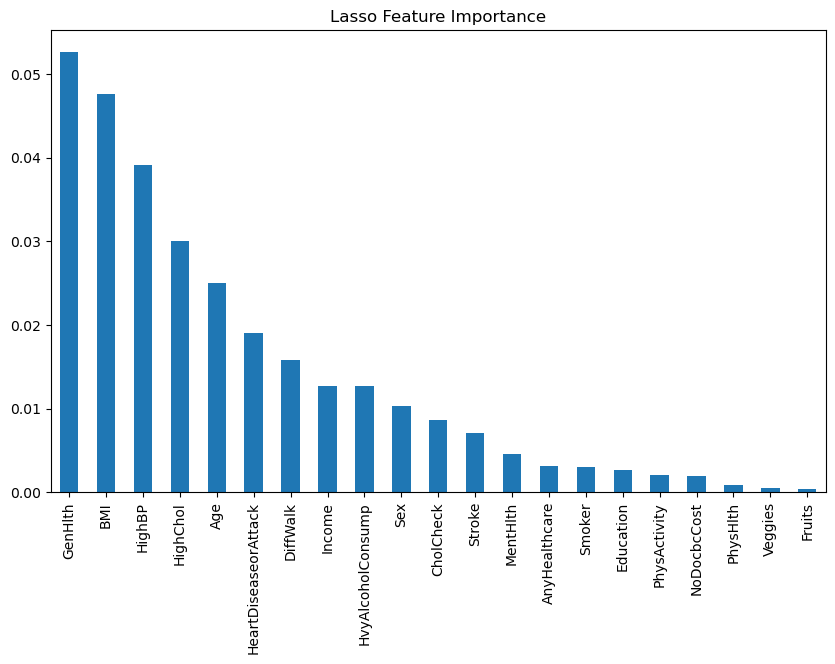

In [54]:
#Feature Importance Using Lasso Regression(Selection)
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

feature_importance = pd.Series(np.abs(lasso.coef_), index=X.columns)
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title="Lasso Feature Importance")
plt.show()


In [55]:
#Recursive Feature Elimination (RFE) with Logistic
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print("Top Features from RFE:", selected_features.tolist())


Top Features from RFE: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age', 'Income']


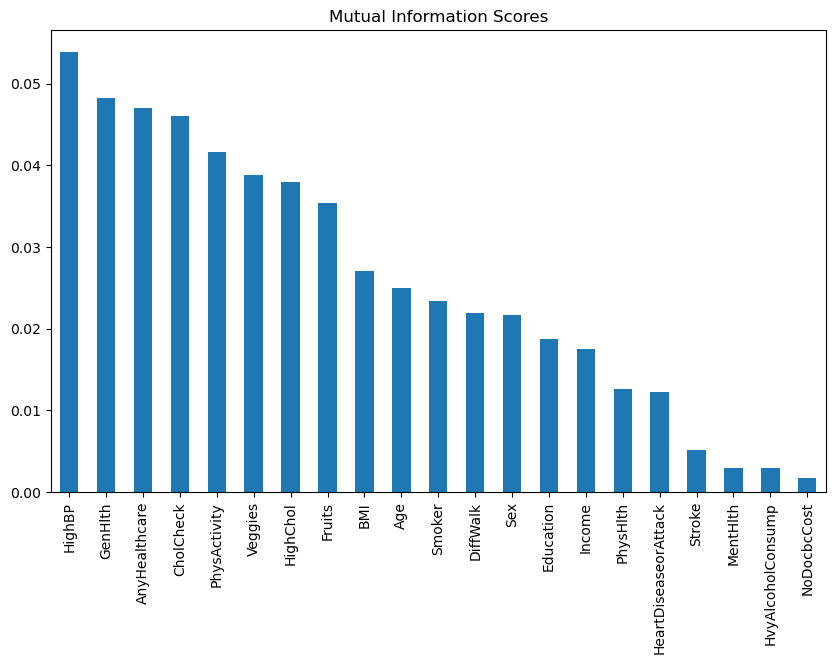

In [56]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.plot(kind='bar', figsize=(10,6), title='Mutual Information Scores')
plt.show()


In [57]:
#Combine Feature Rankings

import pandas as pd

#Convert RFE feature list into ranking (1 = most important)
rfe_ranks = pd.Series(
    data=[len(selected_features) - i for i in range(len(selected_features))],
    index=selected_features,
    name='RFERank'
)
#Normalize Lasso & MI into Rankings
lasso_rank = feature_importance.abs().rank(ascending=False).rename('LassoRank')
mi_rank = mi_series.rank(ascending=False).rename('MIRank')
#Combine All Rankings into One DataFrame

feature_rank_df = pd.concat([lasso_rank, mi_rank, rfe_ranks], axis=1)

#Fill missing RFE ranks with worst rank(total number of features + 1)
feature_rank_df['RFERank'] = feature_rank_df['RFERank'].fillna(len(feature_rank_df) + 1)

#Compute Average Ranking
feature_rank_df['AverageRank'] = feature_rank_df[['LassoRank', 'MIRank', 'RFERank']].mean(axis=1)

#Sort by Average Ranking
combined_rank = feature_rank_df.sort_values(by='AverageRank')

print("\nCombined Feature Rankings:")
print(combined_rank.round(2))



Combined Feature Rankings:
                      LassoRank  MIRank  RFERank  AverageRank
GenHlth                     1.0     2.0      4.0         2.33
HighBP                      3.0     1.0     10.0         4.67
Age                         5.0    10.0      2.0         5.67
BMI                         2.0     9.0      7.0         6.00
HighChol                    4.0     7.0      9.0         6.67
CholCheck                  11.0     4.0      8.0         7.67
Income                      8.0    15.0      1.0         8.00
Sex                        10.0    13.0      3.0         8.67
HeartDiseaseorAttack        6.0    17.0      6.0         9.67
HvyAlcoholConsump           9.0    20.0      5.0        11.33
AnyHealthcare              14.0     3.0     22.0        13.00
DiffWalk                    7.0    12.0     22.0        13.67
PhysActivity               17.0     5.0     22.0        14.67
Veggies                    20.0     6.0     22.0        16.00
Smoker                     15.0    11.0   

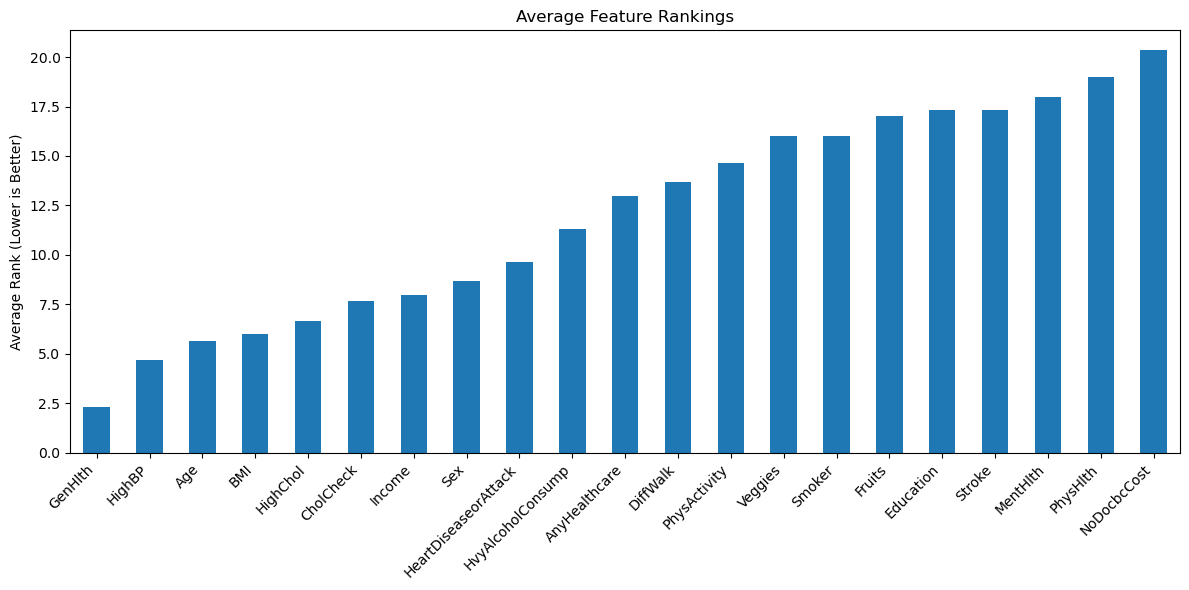

In [58]:
#Bar plot of average ranks
combined_rank['AverageRank'].plot(kind='bar', figsize=(12,6), title='Average Feature Rankings')
plt.ylabel('Average Rank (Lower is Better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


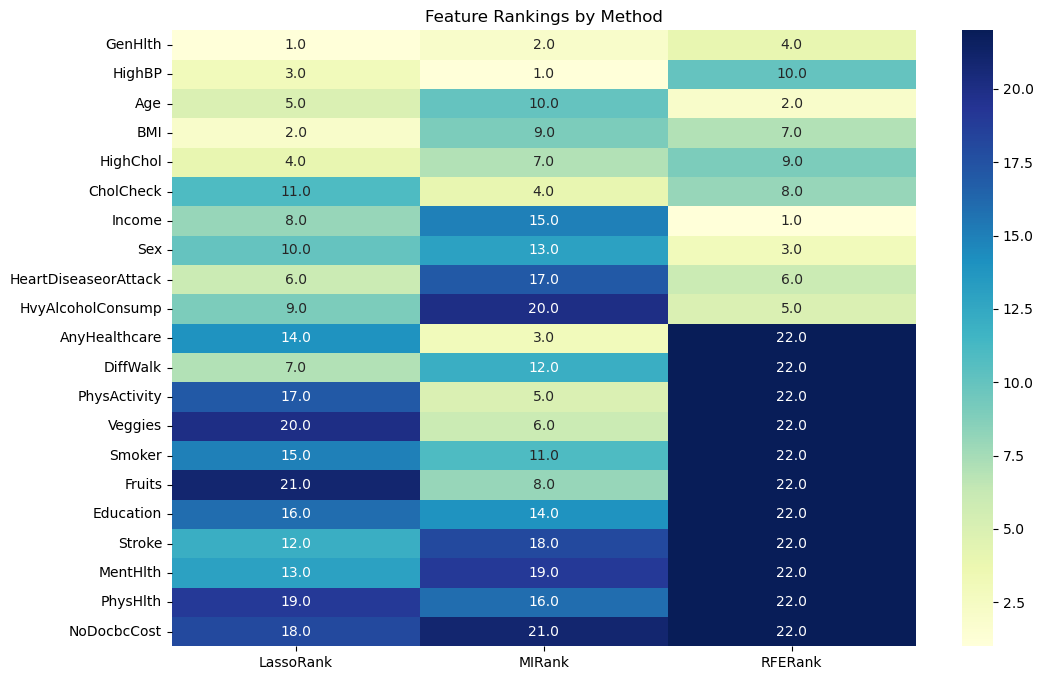

In [59]:

ordered_df = combined_rank.sort_values('AverageRank')

#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ordered_df[['LassoRank', 'MIRank', 'RFERank']], annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Feature Rankings by Method")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [60]:
#menually drop low imapacted feature
top_features = combined_rank.head(10).index.tolist()
X_selected = X[top_features]
X_selected

,GenHlth,HighBP,Age,BMI,HighChol,CholCheck,Income,Sex,HeartDiseaseorAttack,HvyAlcoholConsump
0,5.0,1.0,9.0,40.0,1.0,1.0,3.0,0.0,0.0,0.0
1,3.0,0.0,7.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.0,1.0,9.0,28.0,1.0,1.0,8.0,0.0,0.0,0.0
3,2.0,1.0,11.0,27.0,0.0,1.0,6.0,0.0,0.0,0.0
4,2.0,1.0,11.0,24.0,1.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
253675,3.0,1.0,5.0,45.0,1.0,1.0,7.0,1.0,0.0,0.0
253676,4.0,1.0,11.0,18.0,1.0,1.0,4.0,0.0,0.0,0.0
253677,1.0,0.0,2.0,28.0,0.0,1.0,2.0,0.0,0.0,0.0
253678,3.0,1.0,7.0,23.0,0.0,1.0,1.0,1.0,0.0,0.0


#Step 3: Balancing the Data using SMOTE
#before going to next step check it
print("Original class distribution:")
print(y.value_counts())



In [69]:
print(y.value_counts(normalize=True))

Diabetes_binary
0.0    0.847055
1.0    0.152945
Name: proportion, dtype: float64


In [71]:
#start step3 from here, with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [73]:
#for x_selected
X_resampled, y_resampled = smote.fit_resample(X_selected, y)
#X_resampled, y_resampled = smote.fit_resample(X, y)

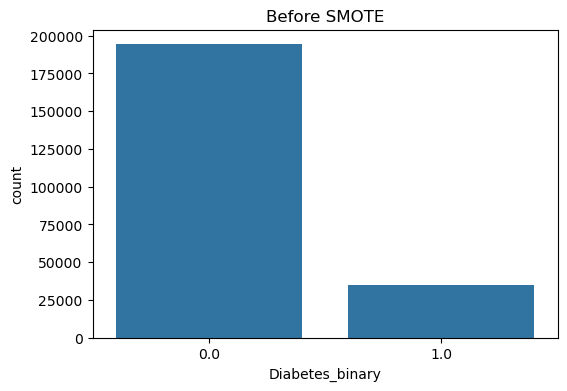

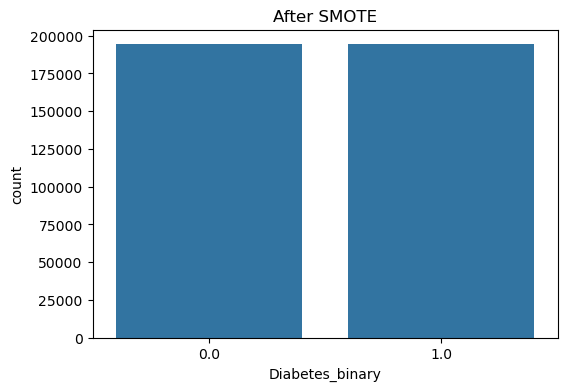

In [74]:
# Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE")
plt.show()

# After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title("After SMOTE")
plt.show()

In [77]:
print(y_resampled.value_counts(normalize=True))

Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [79]:
#SMOTE + Tomek Links
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_bal, y_bal = smote_tomek.fit_resample(X_selected, y)


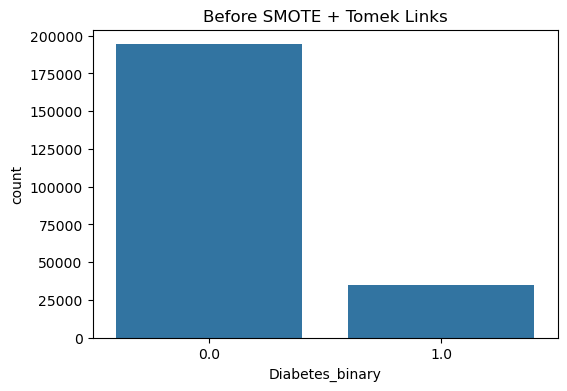

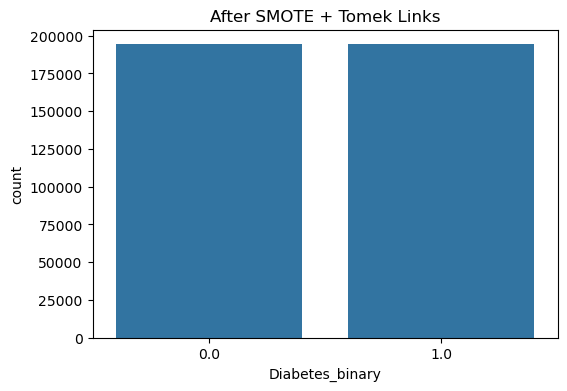

In [81]:
# Before SMOTE + Tomek Links
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE + Tomek Links")
plt.show()

# After SMOTE + Tomek Links
plt.figure(figsize=(6,4))
sns.countplot(x=y_bal)
plt.title("After SMOTE + Tomek Links")
plt.show()

In [83]:
#step4: Train / Test split

# Use SMOTE + Tomek Links balanced data
X_final = X_bal
y_final = y_bal


We’ll use train_test_split() with:80% for training and 20% for testing
stratify=y_final to preserve class balance

In [85]:
#train test, for testing it will be 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42,
    stratify=y_final
)

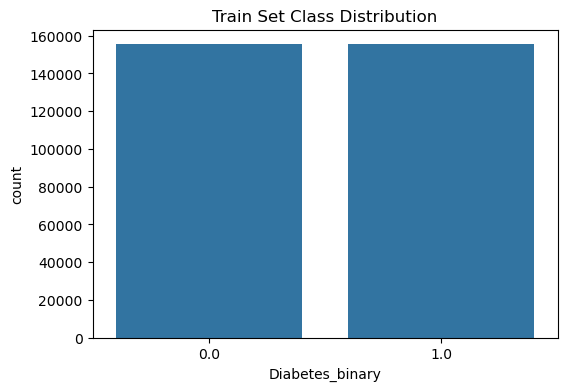

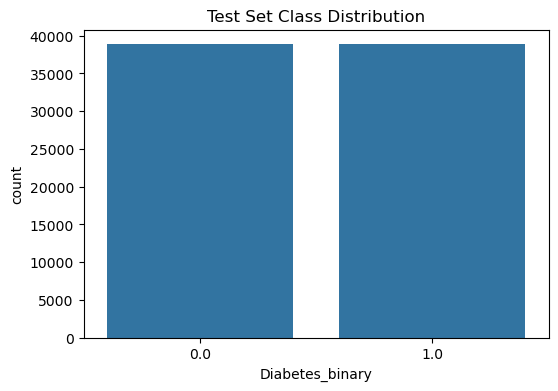

In [87]:
# Training set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Train Set Class Distribution")
plt.show()

# Testing set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title("Test Set Class Distribution")
plt.show()

In [89]:
print("Train set:\n", y_train.value_counts(normalize=True))
print("\nTest set:\n", y_test.value_counts(normalize=True))

Train set:
 Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Test set:
 Diabetes_binary
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


In [91]:
print("Train set count:\n", y_train.value_counts())
print("\nTest set count:\n", y_test.value_counts())

Train set count:
 Diabetes_binary
0.0    155468
1.0    155468
Name: count, dtype: int64

Test set count:
 Diabetes_binary
1.0    38867
0.0    38867
Name: count, dtype: int64


In [95]:
#start Step5 from here


Accuracy=(TP+FP)/(TP+TN+FP+FN)
Pecision=TP/(TP+FP) -> Out of all predction results , how many of them are correctly predcted
Recall=TP/(TP+FN) -> Out of all the actual result , How many of them are correctly predicted results

In [93]:
#1st Model: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

#model training
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

#Prediction
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1] #Only probabilities for class 1
#we can use it Plot ROC curve, AUC score and Apply custom threshold instead of default 0.5 for classification

#Evaluation metrics
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))



Logistic Regression Evaluation:
Accuracy: 0.7374893868834744
Precision: 0.725535709922545
Recall: 0.7639900172382741
F1 Score: 0.7442664862019701
ROC AUC Score: 0.8130133210386715


In [95]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     38867
         1.0       0.73      0.76      0.74     38867

    accuracy                           0.74     77734
   macro avg       0.74      0.74      0.74     77734
weighted avg       0.74      0.74      0.74     77734



Meaning of Terms:
TP (True Positive): Model predicted Yes, and it's really Yes

TN (True Negative): Model predicted No, and it's really No

FP (False Positive): Model predicted Yes, but it's really No

FN (False Negative): Model predicted No, but it's really Yes
                    Predicted
                 ┌───────────────┬───────────────┐
                 │     NO (0)    │    YES (1)     │
        ┌────────┼───────────────┼───────────────┤
Actual  │  NO (0)│     TN        │      FP        │
        ├────────┼───────────────┼───────────────┤
        │  YES(1)│     FN        │      TP        │
        └────────┴───────────────┴───────────────┘

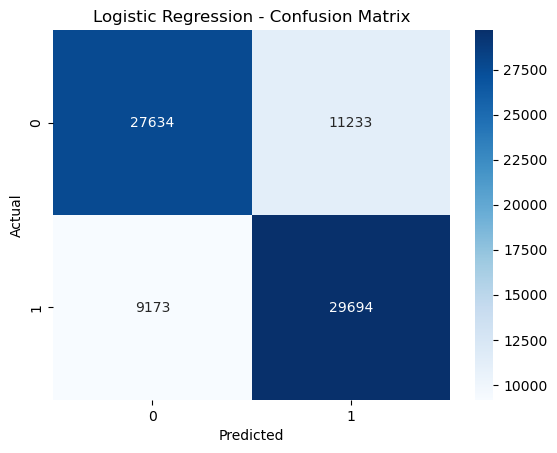

In [97]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

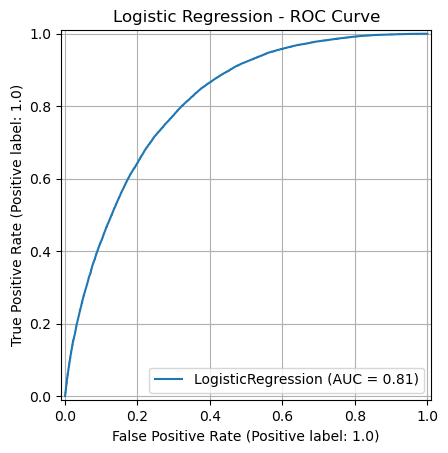

In [99]:
#ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.grid(True)
plt.show()

In [155]:
#2nd modeluse linear SVM Model instead of SVM model(as datasets is large)

from sklearn.svm import LinearSVC

svm_linear = LinearSVC(max_iter=10000, random_state=42)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

#No probability output in LinearSVC, so ROC AUC won't work directly
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("Linear SVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Linear SVM Evaluation:
Accuracy: 0.7376823526384851
Precision: 0.7226131379825533
Recall: 0.7715285460673579
F1 Score: 0.746270142474958

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.70      0.73     38867
         1.0       0.72      0.77      0.75     38867

    accuracy                           0.74     77734
   macro avg       0.74      0.74      0.74     77734
weighted avg       0.74      0.74      0.74     77734



Meaning of Terms:
TP (True Positive): Model predicted Yes, and it's really Yes

TN (True Negative): Model predicted No, and it's really No

FP (False Positive): Model predicted Yes, but it's really No

FN (False Negative): Model predicted No, but it's really Yes
                    Predicted
                 ┌───────────────┬───────────────┐
                 │     NO (0)    │    YES (1)     │
        ┌────────┼───────────────┼───────────────┤
Actual  │  NO (0)│     TN        │      FP        │
        ├────────┼───────────────┼───────────────┤
        │  YES(1)│     FN        │      TP        │
        └────────┴───────────────┴───────────────┘

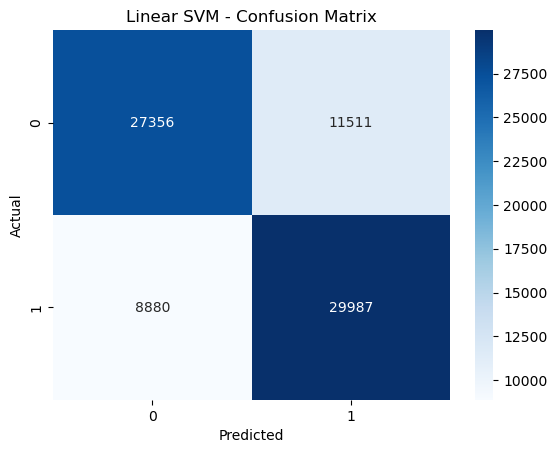

In [103]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Linear SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [109]:
#3rd model XGBOOST Classifier

#first we need to install xgboost
!pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/149.9 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 0.8/149.9 MB 1.2 MB/s eta 0:02:01
   ---------------------------------------- 1.0/149.9 MB 1.3 MB/s eta 0:01:59
   ---------------------------------------- 1.3/149.9 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 1.6/149.9 MB 1.4 MB/s eta 0:01:43
   ---------------------------------------- 1.8/149.9 MB 1.4 MB/s eta 0:01:46
    --------------------------------------- 2.1/149.9 MB 1.4 MB/s eta 0:01:49
    --------------------------------------- 2.4/149.9 MB 1.3 MB/s eta 0:01:50
    --------------------------------------- 2.6/149.9 MB 1.3 MB/s eta 0:01:52
    --------------------------------------- 2.9/149.9 MB 1.3 MB/s eta 0:01:53
    --------------------------------------- 3.1/149.9 MB 1.3 MB/s eta 0:01:53


In [117]:
from xgboost import XGBClassifier

#Traing XGBOOST Classifier model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

#Prediction using XGBOOST Classifier model
y_pred = xgb_model.predict(X_test)


E:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:11:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [119]:
print("XGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

XGBoost Evaluation:
Accuracy: 0.8559060385416934
Precision: 0.8693330485395419
Recall: 0.8377286644196876
F1 Score: 0.8532382961439184

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.86     38867
         1.0       0.87      0.84      0.85     38867

    accuracy                           0.86     77734
   macro avg       0.86      0.86      0.86     77734
weighted avg       0.86      0.86      0.86     77734



Meaning of Terms:
TP (True Positive): Model predicted Yes, and it's really Yes

TN (True Negative): Model predicted No, and it's really No

FP (False Positive): Model predicted Yes, but it's really No

FN (False Negative): Model predicted No, but it's really Yes
                    Predicted
                 ┌───────────────┬───────────────┐
                 │     NO (0)    │    YES (1)     │
        ┌────────┼───────────────┼───────────────┤
Actual  │  NO (0)│     TN        │      FP        │
        ├────────┼───────────────┼───────────────┤
        │  YES(1)│     FN        │      TP        │
        └────────┴───────────────┴───────────────┘

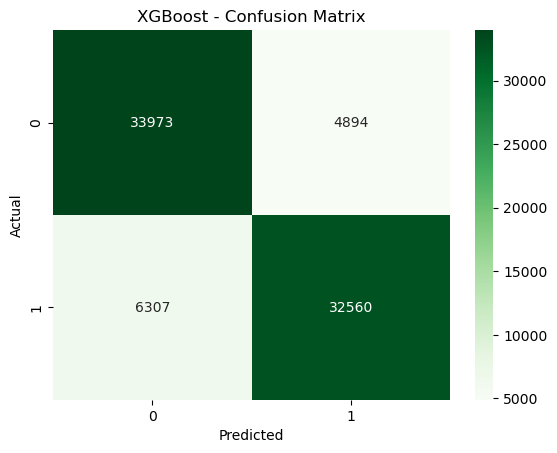

In [121]:
#confussion metrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [125]:
#ANN using TensorFlow

# first we need to install tensorFlow
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 4.2 MB/s eta 0:01:31
   ---------------------------------------- 0.5/376.0 MB 4.2 MB/s eta 0:01:31
   ---------------------------------------- 0.8/376.0 MB 1.2 MB/s eta 0:05:14
   ---------------------------------------- 0.8/376.0 MB 1.2 MB/s eta 0:05:14
   ---------------------------------------- 1.3/376.0 MB 1.4 MB/s eta 0:04:23
   ---------------------------------------- 1.6/376.0 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 1.8/376.0 MB 1.3 MB/s eta 0:04:39
   ---------------------------------------- 2.1/376.0 MB 1.3 MB/s eta 0:04:53
   ---------------------------------------- 2.4/376.0 MB 1.3 MB/s eta 0:04:44
   ---------------------------------------- 2.6/376.0 MB 1.3 MB/s eta 0:04:47
   ---------------------------------------- 2.9/376.0 MB 1.3 MB/s eta 0:04:50
   ---------------------------------------- 3.1/376.0 MB 1.3 MB/s eta 0

In [127]:
#import neccessery metarial for applying ANN using tensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [157]:
#4th ANN architecture Define
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # input layer
ann_model.add(Dropout(0.3))
ann_model.add(Dense(32, activation='relu'))  # hidden layer
ann_model.add(Dropout(0.3))
ann_model.add(Dense(1, activation='sigmoid'))  # output layer

E:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
#model compiling
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [135]:
#model training 
ann_history = ann_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7059 - loss: 0.5762 - val_accuracy: 0.7331 - val_loss: 0.5380
Epoch 2/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7298 - loss: 0.5403 - val_accuracy: 0.7409 - val_loss: 0.5238
Epoch 3/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7351 - loss: 0.5328 - val_accuracy: 0.7461 - val_loss: 0.5226
Epoch 4/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7375 - loss: 0.5279 - val_accuracy: 0.7435 - val_loss: 0.5243
Epoch 5/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7394 - loss: 0.5251 - val_accuracy: 0.7483 - val_loss: 0.5092
Epoch 6/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7415 - loss: 0.5228 - val_accuracy: 0.7513 - val_loss: 0.5110
Epoch 7/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7417 - loss: 0.5216 - val_accuracy: 0.7509 - val_loss: 0.5088
Epoch 8/25
7774/7774 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7433 - loss: 0

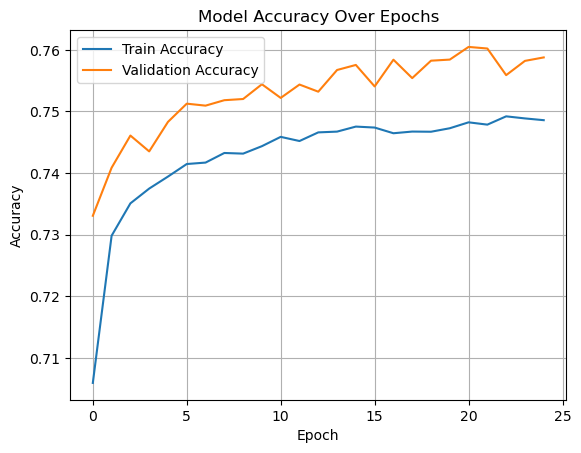

In [139]:
#Accuracy
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()


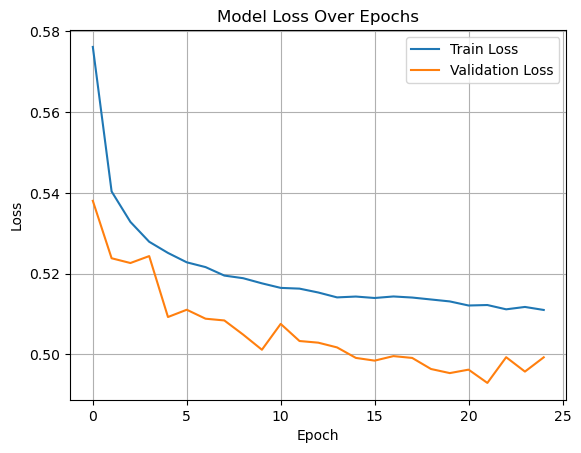

In [141]:
#Loss
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

In [143]:
#Predictions(rounded to 0 or 1)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("ANN Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


2430/2430 ━━━━━━━━━━━━━━━━━━━━ 2s 735us/step
ANN Evaluation:
Accuracy: 0.49980703424498935
Precision: 0.3333333333333333
Recall: 0.0003859315100213549
F1 Score: 0.0007709703947368421

Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     38867
         1.0       0.33      0.00      0.00     38867

    accuracy                           0.50     77734
   macro avg       0.42      0.50      0.33     77734
weighted avg       0.42      0.50      0.33     77734



Meaning of Terms:
TP (True Positive): Model predicted Yes, and it's really Yes

TN (True Negative): Model predicted No, and it's really No

FP (False Positive): Model predicted Yes, but it's really No

FN (False Negative): Model predicted No, but it's really Yes
                    Predicted
                 ┌───────────────┬───────────────┐
                 │     NO (0)    │    YES (1)     │
        ┌────────┼───────────────┼───────────────┤
Actual  │  NO (0)│     TN        │      FP        │
        ├────────┼───────────────┼───────────────┤
        │  YES(1)│     FN        │      TP        │
        └────────┴───────────────┴───────────────┘

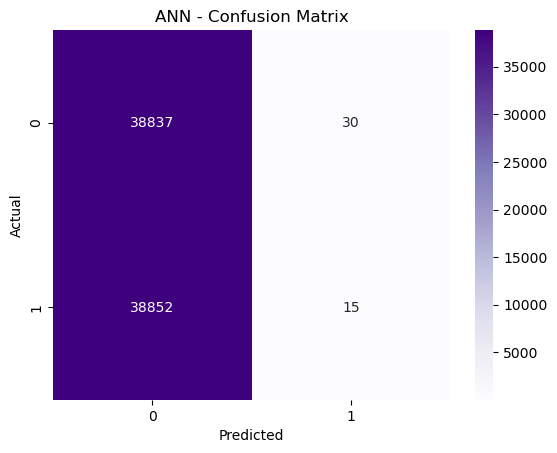

In [145]:
#confusion metrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("ANN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [149]:
from sklearn.ensemble import RandomForestClassifier

#model training and initialization
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Prediction
rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

#Evaluation
print("Random Forest Classifier Results:\n")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))


Random Forest Classifier Results:

[[33969  4898]
 [ 5429 33438]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     38867
         1.0       0.87      0.86      0.87     38867

    accuracy                           0.87     77734
   macro avg       0.87      0.87      0.87     77734
weighted avg       0.87      0.87      0.87     77734

Accuracy: 0.8671495098669822
ROC-AUC: 0.9372994236233823


In [151]:
print("\nClassification Report:\n", classification_report(y_test, rf_preds))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     38867
         1.0       0.87      0.86      0.87     38867

    accuracy                           0.87     77734
   macro avg       0.87      0.87      0.87     77734
weighted avg       0.87      0.87      0.87     77734



Meaning of Terms:
TP (True Positive): Model predicted Yes, and it's really Yes

TN (True Negative): Model predicted No, and it's really No

FP (False Positive): Model predicted Yes, but it's really No

FN (False Negative): Model predicted No, but it's really Yes
                    Predicted
                 ┌───────────────┬───────────────┐
                 │     NO (0)    │    YES (1)     │
        ┌────────┼───────────────┼───────────────┤
Actual  │  NO (0)│     TN        │      FP        │
        ├────────┼───────────────┼───────────────┤
        │  YES(1)│     FN        │      TP        │
        └────────┴───────────────┴───────────────┘

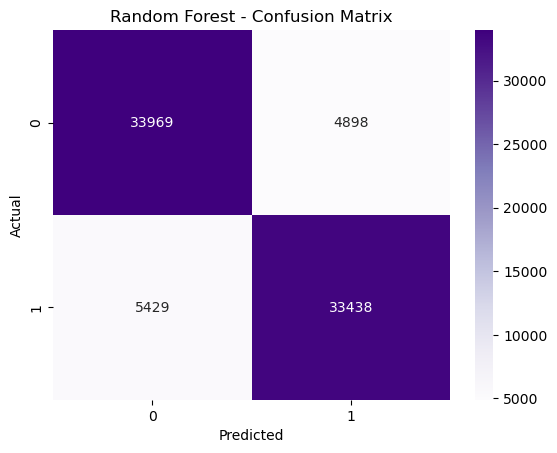

In [153]:
#confusion metrix
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [159]:
#Start Step6: Hyperparmeter Tuning

In [161]:
#1st model logistic regression
from sklearn.model_selection import GridSearchCV

#model define
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

#hyperparameter grid define
param_grid = {
    'penalty': ['l1', 'l2'], # L1 = Lasso, L2 = Ridge
    'C': [0.01, 0.1, 1, 10, 100]  # Reguarization strength (lower =to stronger)
}

#GridSearchCV set
grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='recall', # Optimize for recall
    cv=5,
    n_jobs=-1,
    verbose=1
)


In [163]:
#model fiting
grid_search_lr.fit(X_train, y_train)
#best one
best_lr = grid_search_lr.best_estimator_

#Evaluation
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]

#printe

print("Best Hyperparameters:", grid_search_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.7378109964751589
Precision: 0.7253620714877846
Recall: 0.7654308282090205
F1 Score: 0.7448579762396564
ROC-AUC Score: 0.8125333143995943

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     38867
         1.0       0.73      0.77      0.74     38867

    accuracy                           0.74     77734
   macro avg       0.74      0.74      0.74     77734
weighted avg       0.74      0.74      0.74     77734



In [165]:
#2nd model linear SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm = LinearSVC(class_weight='balanced', max_iter=10000, random_state=42)


pipeline = make_pipeline(StandardScaler(), svm)

#Hyperparameter grid
param_grid = {
    'linearsvc__C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    'linearsvc__loss': ['hinge', 'squared_hinge'] # Type of loss function
}

#GridSearchCV set
grid_search_svm = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',   
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [167]:

grid_search_svm.fit(X_train, y_train)

#Best one
best_svm = grid_search_svm.best_estimator_

#Prediction
y_pred_svm = best_svm.predict(X_test)

#Evaluation

print("Best Hyperparameters:", grid_search_svm.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


E:\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Hyperparameters: {'linearsvc__C': 10, 'linearsvc__loss': 'hinge'}
Accuracy: 0.7373864718141354
Precision: 0.7149046188246804
Recall: 0.7896930558056964
F1 Score: 0.750440097799511

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.69      0.72     38867
         1.0       0.71      0.79      0.75     38867

    accuracy                           0.74     77734
   macro avg       0.74      0.74      0.74     77734
weighted avg       0.74      0.74      0.74     77734



In [169]:
#3rd model XGBOOST classifier

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


#Create XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
}

#Randomized Search
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


In [171]:
xgb_random_search.fit(X_train, y_train)

best_xgb = xgb_random_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)

#Evaluation
print("Best Hyperparameters:", xgb_random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


E:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:42:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Accuracy: 0.8409833534875344
Precision: 0.8372093023255814
Recall: 0.8465793603828441
F1 Score: 0.8418682597960828

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     38867
         1.0       0.84      0.85      0.84     38867

    accuracy                           0.84     77734
   macro avg       0.84      0.84      0.84     77734
weighted avg       0.84      0.84      0.84     77734



In [173]:
#4th model

In [175]:
#Base model
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

#Random Search
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


In [177]:
rf_random_search.fit(X_train, y_train)

best_rf = rf_random_search.best_estimator_

#Prediction
y_pred_rf = best_rf.predict(X_test)

#Evaluation
print("Best Hyperparameters:", rf_random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Accuracy: 0.8509403864460854
Precision: 0.83876415656666
Recall: 0.8689119304294132
F1 Score: 0.8535719250357003

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.85     38867
         1.0       0.84      0.87      0.85     38867

    accuracy                           0.85     77734
   macro avg       0.85      0.85      0.85     77734
weighted avg       0.85      0.85      0.85     77734



In [179]:
#step 7: bar chart for comparison the perfomace of all


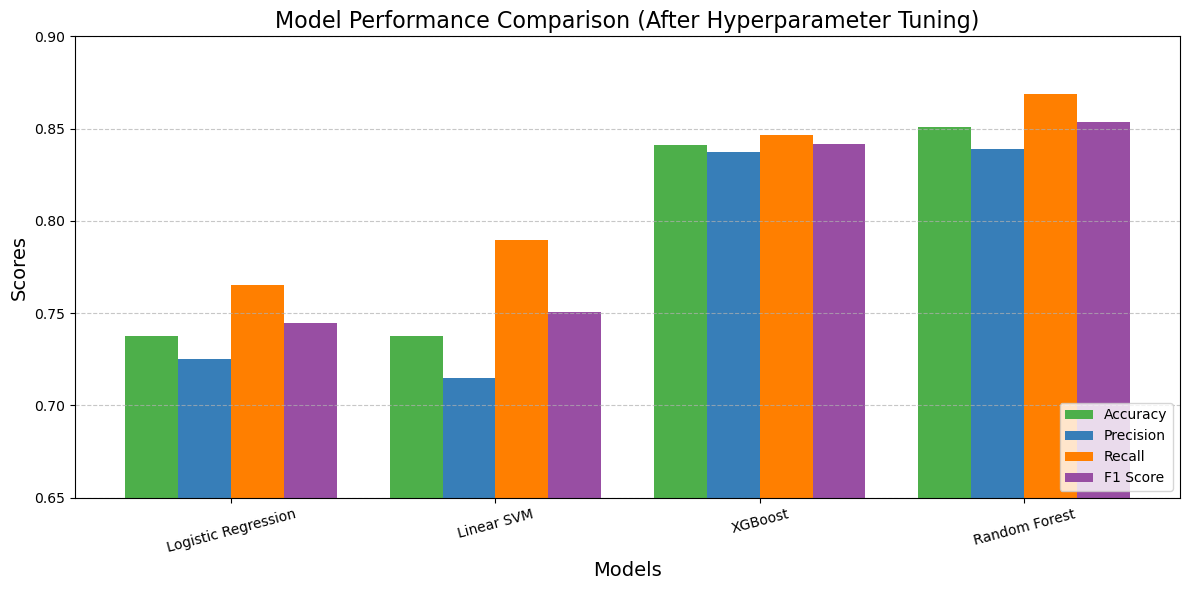

In [181]:
models = ['Logistic Regression', 'Linear SVM', 'XGBoost', 'Random Forest']

#metric scores results
accuracy = [0.7378, 0.7374, 0.8410, 0.8509]
precision = [0.7254, 0.7149, 0.8372, 0.8388]
recall = [0.7654, 0.7897, 0.8466, 0.8689]
f1_score = [0.7449, 0.7504, 0.8419, 0.8536]

#bar width and positions
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

#Plotting
plt.figure(figsize=(12, 6))
plt.bar(r1, accuracy, width=bar_width, label='Accuracy', color='#4daf4a')
plt.bar(r2, precision, width=bar_width, label='Precision', color='#377eb8')
plt.bar(r3, recall, width=bar_width, label='Recall', color='#ff7f00')
plt.bar(r4, f1_score, width=bar_width, label='F1 Score', color='#984ea3')

#styles
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Model Performance Comparison (After Hyperparameter Tuning)', fontsize=16)
plt.xticks([r + 1.5 * bar_width for r in range(len(models))], models, rotation=15)
plt.ylim([0.65, 0.9])
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)




plt.tight_layout()
plt.show()
